---
title: "Linear Regression For Classification"
description: "Linear Regression isn't suitable for classification due to its inability to predict probabilities and handle categorical outcomes; Logistic Regression addresses these issues by modeling probabilities and accommodating binary classification tasks effectively."
jupyter: python3
author: "Vraj Shah"
date: "8/18/2023"
---

### Libraries Required

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm

### Dataset

In [3]:
x_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_train = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1])

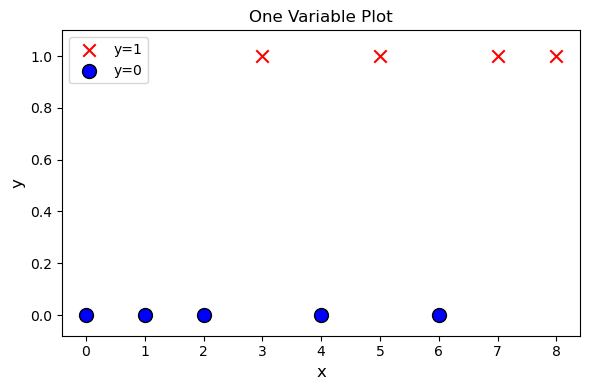

In [4]:
pos = y_train == 1
neg = y_train == 0

plt.figure(figsize=(6, 4))

plt.scatter(x_train[pos], y_train[pos],
            marker='x', s=80, c='red', label="y=1")
plt.scatter(x_train[neg], y_train[neg], marker='o',
            s=100, label="y=0", facecolors='blue', edgecolors='black', linewidth=1)
plt.ylim(-0.08, 1.1)
plt.ylabel('y', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.title('One Variable Plot')
plt.legend()

plt.tight_layout()
plt.show()

### Using Linear Regression

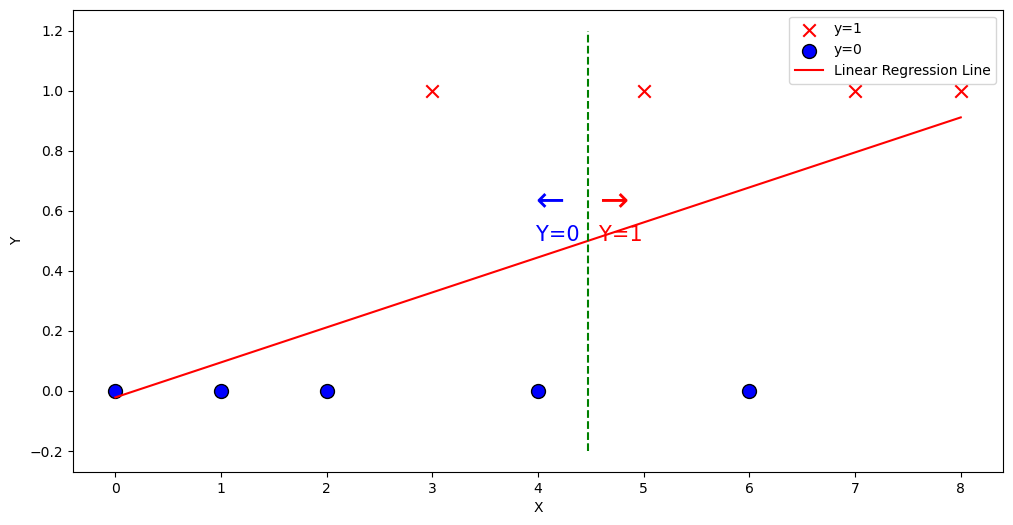

In [42]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_train)

y_line = np.array([0.5] * len(x_train))

x_intersection = (0.5 - model.intercept_[0]) / model.coef_[0]


plt.figure(figsize=(12, 6))
plt.scatter(x_train[pos], y_train[pos], marker='x', s=80, c='red', label="y=1")
plt.scatter(x_train[neg], y_train[neg], marker='o', s=100,
            label="y=0", facecolors='blue', edgecolors='black', linewidth=1)

plt.plot(x_train, y_pred, color='red', label='Linear Regression Line')
plt.plot([x_intersection, x_intersection],
         [-0.2, 1.2], color='green', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.annotate('←', xy=(x_intersection, 0.5), xytext=(x_intersection - 0.5, 0.6), fontsize=25, color='blue')
plt.annotate('Y=0', xy=(x_intersection, 0.5), xytext=(x_intersection - 0.5, 0.5), fontsize=15, color='blue')
plt.annotate('→', xy=(x_intersection, 0.5), xytext=(x_intersection + 0.1, 0.6),fontsize=25, color='red')
plt.annotate('Y=1', xy=(x_intersection, 0.5), xytext=(x_intersection + 0.1, 0.5), fontsize=15, color='red')
plt.show()

### Logistic Square Error Cost

In [6]:
def compute_cost_logistic_sq_err(X, y, w, b):
    z = np.dot(X, w) + b
    f_wb = 1 / (1 + np.exp(-z))
    cost = np.mean((f_wb - y) ** 2) / 2
    return cost

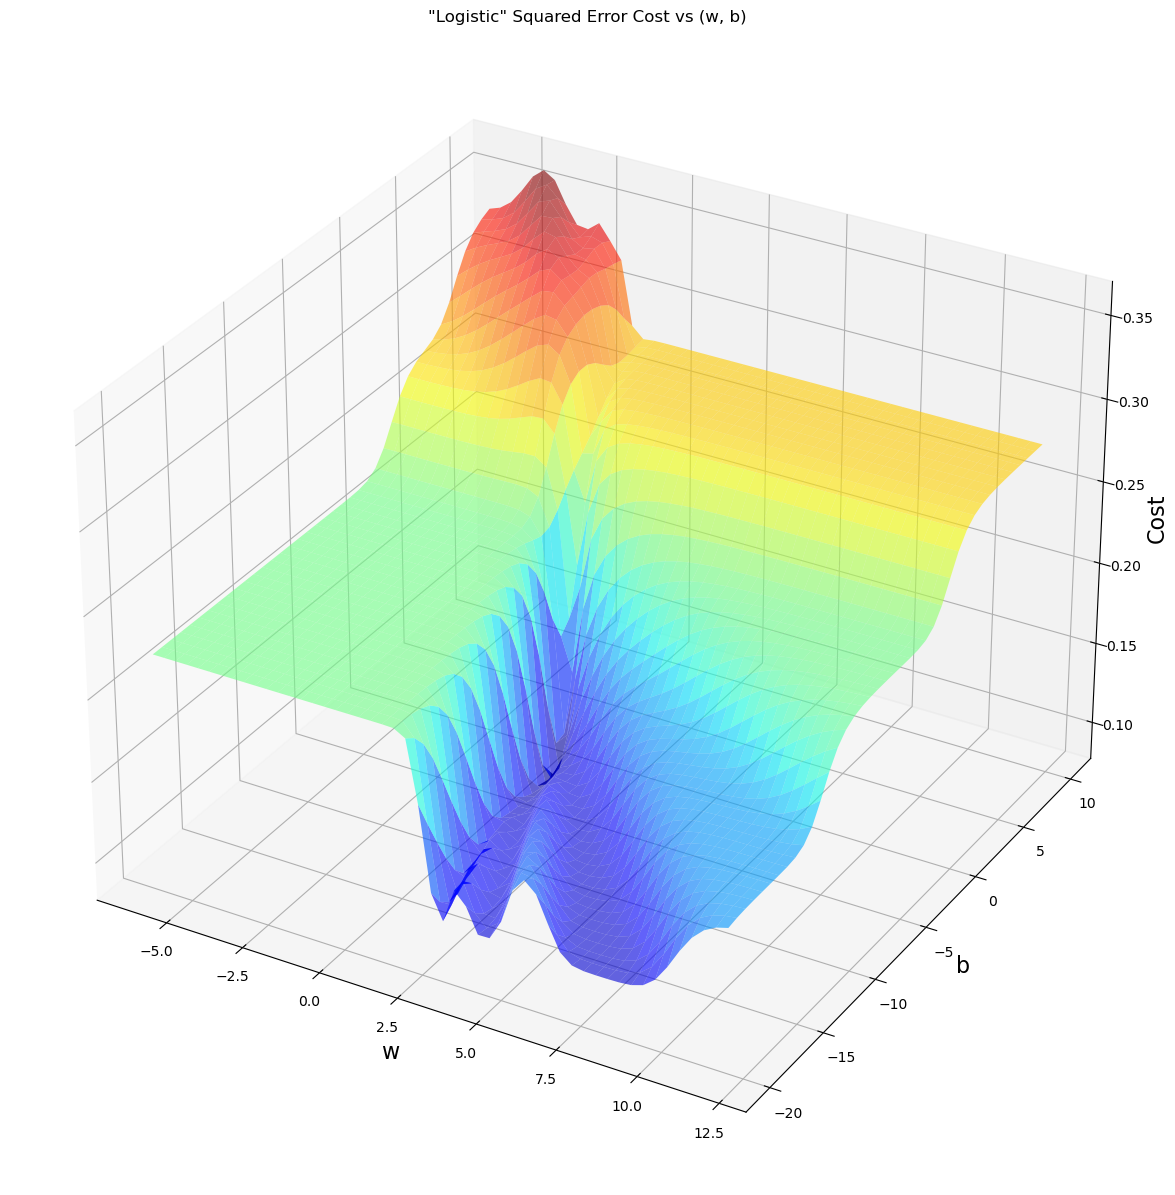

In [7]:
wx, by = np.meshgrid(np.linspace(-6, 12, 50),
                     np.linspace(10, -20, 40))
points = np.c_[wx.ravel(), by.ravel()]
cost = np.zeros(points.shape[0])

for i in range(points.shape[0]):
    w, b = points[i]
    cost[i] = compute_cost_logistic_sq_err(x_train, y_train, w, b)

cost = cost.reshape(wx.shape)

fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(wx, by, cost, alpha=0.6, cmap=cm.jet)
ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('"Logistic" Squared Error Cost vs (w, b)')

plt.show()
